In [1]:
%matplotlib inline

import numpy as np
from scipy.interpolate import UnivariateSpline as usp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [2]:
max_speeds = np.load('max-speeds.npy')
max_speeds = np.sort(max_speeds)
years_nb = max_speeds.shape[0]

cprob = np.array([i/(years_nb + 1) for i in range(years_nb)])

function = usp(cprob, max_speeds)

prob = np.linspace(0, 1, 1000)
speeds = function(prob)

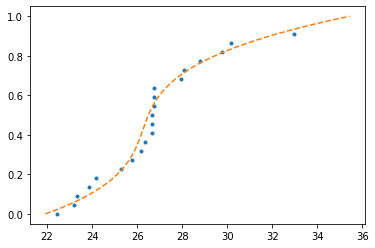

In [3]:
# Plotting all the things because I can't seem to get the right function

plt.plot(max_speeds, cprob, marker = '.', linestyle='')
plt.plot(speeds, prob, linestyle ='--', color = 'tab:orange')
plt.show()

In [4]:
fifty_prob = 1-0.02
fifty_wind = function(fifty_prob)
print('Maximum wind speed is {:.2f}'.format(fifty_wind))

Maximum wind speed is 34.63


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celsius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

(-3.56476092380043, -3.8722552966841435)

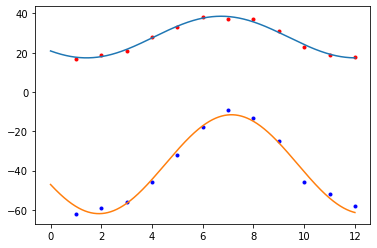

In [5]:

#Set up the arrays
months = np.arange(1,13)
max_temps = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#Find averages
max_avg = np.average(max_temps)
min_avg = np.average(min_temps)

#define fitting curve
def sine_fit(x, A, freq, avg, offset):
    return avg + A * np.sin(freq * x - offset)


fit_maxes = curve_fit(sine_fit, months, max_temps, p0 = [(max_temps.max()-max_temps.min()), 1, max_avg, 0])
fit_mins = curve_fit(sine_fit, months, min_temps, p0 = [(min_temps.max()-min_temps.min()), 1, min_avg, 0])

x_months = np.linspace(0, months.max(), 10000)

plt.plot(months, max_temps, 'r.', months, min_temps, 'b.')
plt.plot(x_months, sine_fit(x_months, *fit_maxes[0]))
plt.plot(x_months, sine_fit(x_months, *fit_mins[0]))

fit_mins[0][3], fit_maxes[0][3]

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


<Figure size 432x288 with 0 Axes>

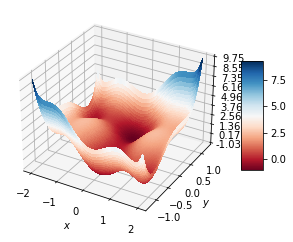

In [6]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1.25, 1.25, 100)
grid = np.meshgrid(x, y)
X,Y = grid

plt.clf()

def camelback(points):
    x, y = points
    return (4 - 2.1 * x**2 + x**4/3) * x**2 + x * y + (4*y**2 - 4)*y**2


function = camelback((X,Y))

# Got this snippet to make the 3D-plot, makes it easier to see than a cmap.
# Taken from https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, function, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [7]:
# Onto finding the minima. There are two clear ones. One for y>0, one for y<0. I am choosing a method that does not require differentiating the function for the sake of simplicity.
#Both the Powell and the Nelder-Mead method yield similar results for the purpose. If I had to use a calculus-based method, I'd go with the Newton converging gradient algorithm. But for this function, it seems like overkill since it diverges quickly away from the domain.

from scipy.optimize import minimize
initial_guess = (0, -0.5)

min_yneg = minimize(camelback, initial_guess, method = 'Nelder-Mead')['x']
print("on the negative y, minimum is at (x,y) = ({:.3f}, {:.3f})".format(float(min_yneg[0]), float(min_yneg[1])))
      
initial_guess = (0, 0.5)
min_ypos = minimize(camelback, initial_guess, method = 'Nelder-Mead')['x']
print("on the positive y, minimum is at (x,y) = ({:.3f}, {:.3f})".format(float(min_ypos[0]), float(min_ypos[1])))

on the negative y, minimum is at (x,y) = (0.090, -0.713)
on the positive y, minimum is at (x,y) = (-0.090, 0.713)


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

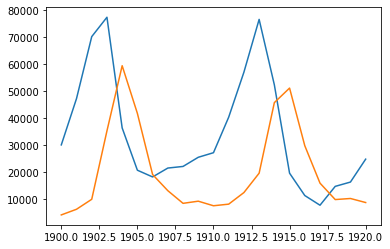

Period of hare population 10.5
Period of lynx population 10.5


In [8]:
from scipy import fft

year, hares, lynxes, carrots = np.loadtxt('populations.txt', unpack = True, dtype = int)
plt.clf()
plt.plot(year, hares)
plt.plot(year, lynxes)
plt.show()
#We want to find the period of the oscillation in populations. For that we can likely find the FFT, compute its maximum and just take the reciprocal. I'll do all that in a function and then apply it to each population. Ideally the period should be close.
def fft_analyze(data, domain):
    
    from scipy import fft
    
    data_fft = fft.fft(data)
    freq_range = fft.fftfreq(data_fft.size, d = (domain[1] - domain[0]))
    power = np.abs(data_fft)

    pos_mask = np.where(freq_range > 0)
    freqs = freq_range[pos_mask]
    peak_freq = freqs[power[pos_mask].argmax()]
    period = 1/peak_freq
    return period

lynx_period = fft_analyze(lynxes, year)
hare_period = fft_analyze(hares, year)

print("Period of hare population {}".format(hare_period))
print("Period of lynx population {}".format(lynx_period))

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

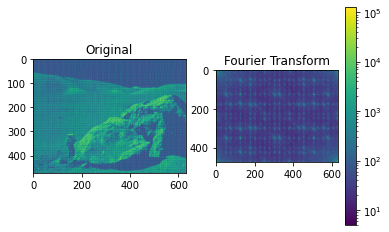

In [12]:
from matplotlib.colors import LogNorm

#I opened up the picture and saw the noise is visible both vertically and horizontally to occur at very high frequencies.
#Because of this, I found it was better to normalize the FFT plot to a logarithmic scale, which would accentuate the differences.

image = plt.imread('moonlanding.png')

data_fft = fft.fft2(image)

fig, ax = plt.subplots(1,2)
original = ax[0].imshow(image)
ax[0].set_title('Original')
transform = ax[1].imshow(abs(data_fft), norm = LogNorm(vmin = 5))
fig.colorbar(transform)
ax[1].set_title('Fourier Transform')

plt.show()

In [ ]:
#I found this method in the scipy tutorial where this exercise came from. I am not completely clear on how fft.fft2 constructs the 2Darray, but it seems that leaving the corners of the fft spectrum clears out most of the noise. However, a lot of detail is also removed, as can be seen on the surface of the rock.
rows, cols = np.shape(data_fft)
keep_percent = 0.1
fft_copy = data_fft.copy()
fft_copy[int(rows*keep_percent) : int(rows*(1-keep_percent))] = 0
fft_copy[ : ,int(cols*keep_percent) : int(cols*(1-keep_percent))] = 0
filtered_data = fft_copy

#I attempted this method instead. I thought the fft would just store different frequency values, and then I could just set the highest values to zero or to the average value of the coefficients. The other method wipes out so many coefficients (since we only keep about 20% of the spectrum), I can't seem to understand why it works so well. I commented out filtered_data on this bit of code, but uncommenting it will make my attempt at the solution visible.
fft_copy2 = data_fft.copy()
fft_avg = np.average(fft_copy2)
#filtered_data = np.where(fft_copy2 > 2e2, fft_copy2, 0)

filtered_image = fft.ifft2(filtered_data).real

my_dpi = 600

fig1 = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
fig2 = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

ax = plt.Axes(fig1, [0., 0., 1., 1.])
ax2 = plt.Axes(fig2, [0., 0., 1., 1.])

ax.set_axis_off()
ax2.set_axis_off()
fig1.add_axes(ax)
fig2.add_axes(ax2)
im = ax.imshow(filtered_image)
im2 = ax2.imshow(image)
plt.savefig('filteredimg.png')